In [1]:
from sklearn.datasets import fetch_openml
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import numpy as np 

c:\Users\matth\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


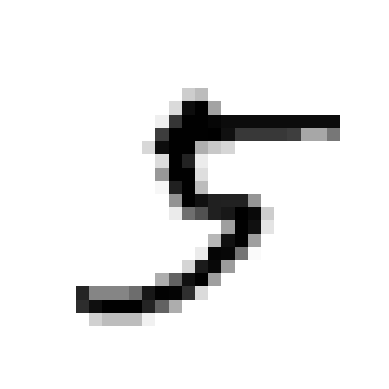

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

some_digit = X.iloc[36011]
some_digit_image = some_digit.values.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [3]:
X_train,X_test,y_train,y_test =X[:60000],X[60000:],y[:60000], y[60000:]


In [4]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train.iloc[shuffle_index], y_train.iloc[shuffle_index]


In [5]:
y_train_5 = (y_train == '5') 
y_test_5 = (y_test == '5')

In [6]:
sgd_clf = SGDClassifier(random_state=42) 
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([some_digit])

c:\Users\matth\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])

In [7]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


In [8]:
from sklearn.base import BaseEstimator 

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None): 
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [9]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy") 


array([0.90765, 0.9108 , 0.9105 ])

In [10]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix 

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

confusion_matrix(y_train_5, y_train_pred)


array([[53565,  1014],
       [ 1341,  4080]], dtype=int64)

In [11]:

from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) 


0.800942285041225

In [12]:
recall_score(y_train_5, y_train_pred)  

0.7526286662977311

In [13]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

c:\Users\matth\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array(['5'], dtype='<U1')

In [14]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])
len(ovo_clf.estimators_)

c:\Users\matth\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  warnings.warn(


45

In [15]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=0)
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

c:\Users\matth\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array(['5'], dtype=object)

In [16]:
forest_clf.predict_proba([some_digit])

c:\Users\matth\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[0.01, 0.01, 0.02, 0.02, 0.01, 0.84, 0.  , 0.03, 0.02, 0.04]])

In [17]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.88565, 0.8858 , 0.87765])